<a href="https://colab.research.google.com/github/KunakornMart/DADS6003/blob/main/ML_6610422020_KunakornPruksakorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import, Survey and clean data

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/KunakornMart/DADS6003/main/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [54]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


เปลี่ยนเป็นตัวเลขทั้งหมด Column "Yes","No" ให้เป็น 1,0 ตามลำดับ (Yes=1 , No=0)

In [56]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})

#Status furnished มี 3เงื่อนไข จึงแยกเป็น 3คอลัมน์
df['furnished'] = df['furnishingstatus'].map({'furnished':1, 'unfurnished':0 ,'semi-furnished':0})
df['semi-furnished'] = df['furnishingstatus'].map({'semi-furnished':1, 'unfurnished':0 ,'furnished':0})
df['unfurnished'] = df['furnishingstatus'].map({'unfurnished':1, 'furnished':0 ,'semi-furnished':0})

#drop column furnushingstatus เก่าทิ้ง
df.drop(['furnishingstatus'],axis=1,inplace=True)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [57]:
df.info()
#เช็คว่า Dtype เป็น int ทั้งหมด เพราะ Linear Regression ใช้ได้เฉพาะข้อมูลที่เป็นตัวเลขเท่านั้น

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  furnished        545 non-null    int64
 13  semi-furnished   545 non-null    int64
 14  unfurnished      545 non-null    int64
dtypes: int64(15)
memory usage: 64.0 KB


<Axes: xlabel='area', ylabel='price'>

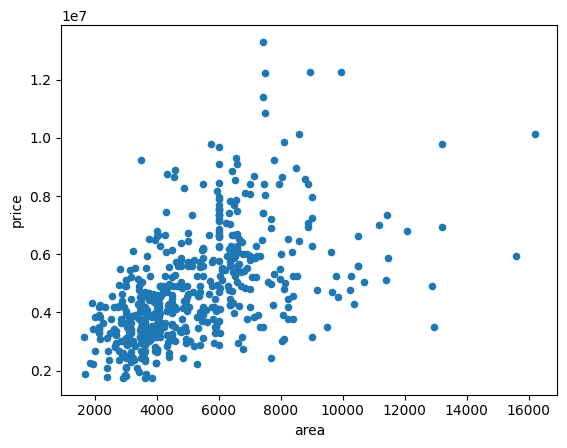

In [58]:
df.plot(kind='scatter',x='area',y='price')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'semi-furnished'}>,
        <Axes: title={'center': 'unfurnished'}>, <Axes: >]], dtype=object)

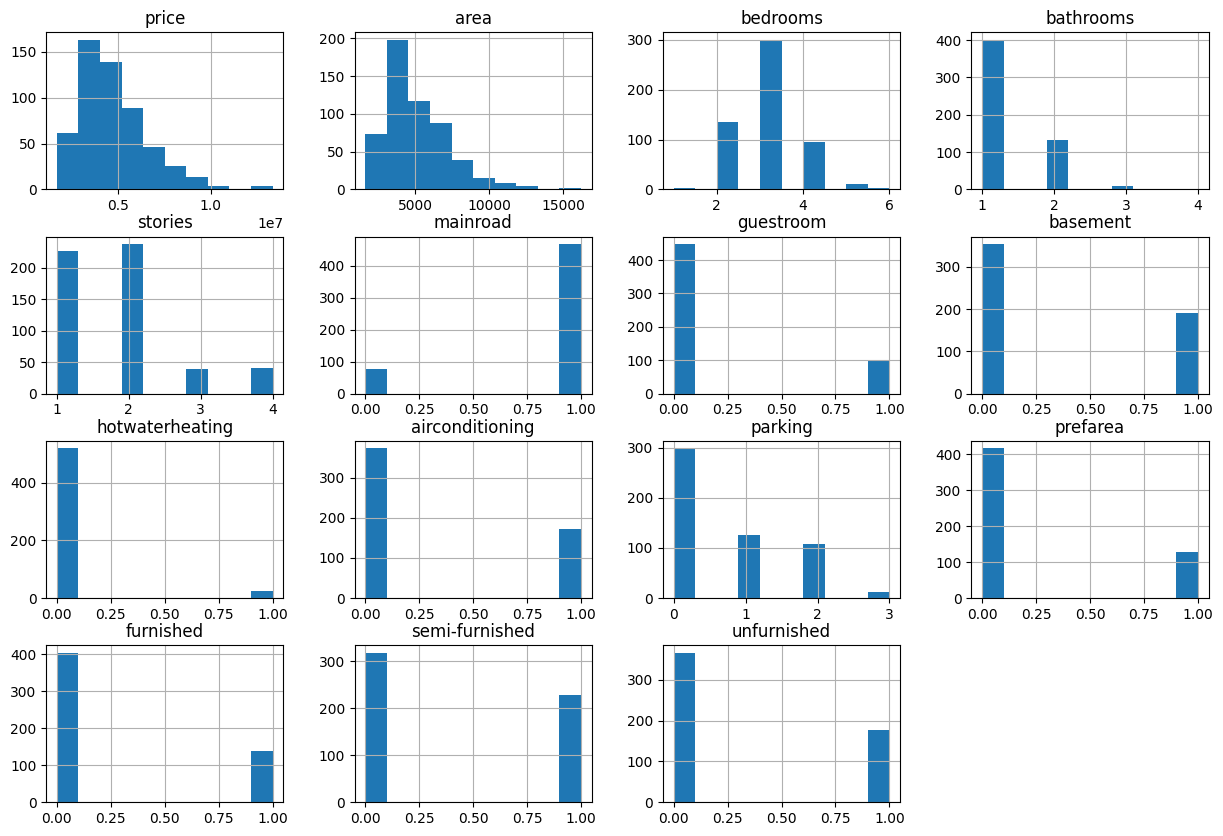

In [59]:
df.hist(figsize=(15,10))

ตัดข้อมูลช่วง Outlier ออก

In [60]:
df = df[(df.price<8000000)&(df.area<8000)&(df.bedrooms<=5)]

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >]], dtype=object)

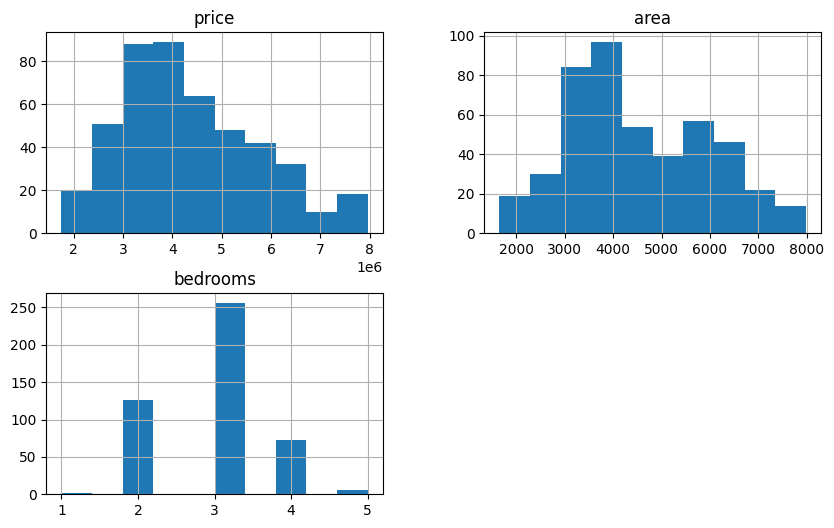

In [61]:
df[['price','area','bedrooms']].hist(figsize=(10,6))

In [62]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
price,1.000000,0.568967,0.321226,4.221643e-01,0.471465,3.066435e-01,0.299081,0.177022,0.042967,0.445491,0.259195,0.316124,0.158460,0.149121,-0.293511
area,0.568967,1.000000,0.123002,1.590261e-01,0.123507,2.899596e-01,0.264346,0.055789,-0.017398,0.267018,0.235390,0.230152,0.087585,0.025358,-0.103167
bedrooms,0.321226,0.123002,1.000000,3.268771e-01,0.419986,-5.543166e-02,0.055432,0.095726,0.029520,0.164997,0.065013,0.073002,0.032938,0.096719,-0.129035
bathrooms,0.422164,0.159026,0.326877,1.000000e+00,0.290442,2.967027e-16,0.104834,0.126809,0.038327,0.147815,0.112634,0.018759,0.063565,0.073327,-0.131721
stories,0.471465,0.123507,0.419986,2.904419e-01,1.000000,1.202734e-01,0.032381,-0.174590,0.017701,0.275039,-0.030947,0.025660,0.086951,0.019584,-0.096633
mainroad,0.306643,0.289960,-0.055432,2.967027e-16,0.120273,1.000000e+00,0.090909,0.038830,-0.024373,0.086106,0.168154,0.200409,0.117803,0.017639,-0.121716
guestroom,0.299081,0.264346,0.055432,1.048345e-01,0.032381,9.090909e-02,1.000000,0.353559,-0.004875,0.107633,0.035083,0.186094,0.117803,0.017639,-0.121716
basement,0.177022,0.055789,0.095726,1.268088e-01,-0.174590,3.883013e-02,0.353559,1.000000,-0.033523,0.018521,0.028469,0.240772,0.079803,0.043800,-0.115420
hotwaterheating,0.042967,-0.017398,0.029520,3.832673e-02,0.017701,-2.437285e-02,-0.004875,-0.033523,1.000000,-0.105352,0.045613,-0.052334,-0.034285,0.087848,-0.060815
airconditioning,0.445491,0.267018,0.164997,1.478154e-01,0.275039,8.610617e-02,0.107633,0.018521,-0.105352,1.000000,0.078932,0.071029,0.120082,-0.027972,-0.076508


Plot Correlation แบบ Heatmap เพื่อง่ายต่อการดู

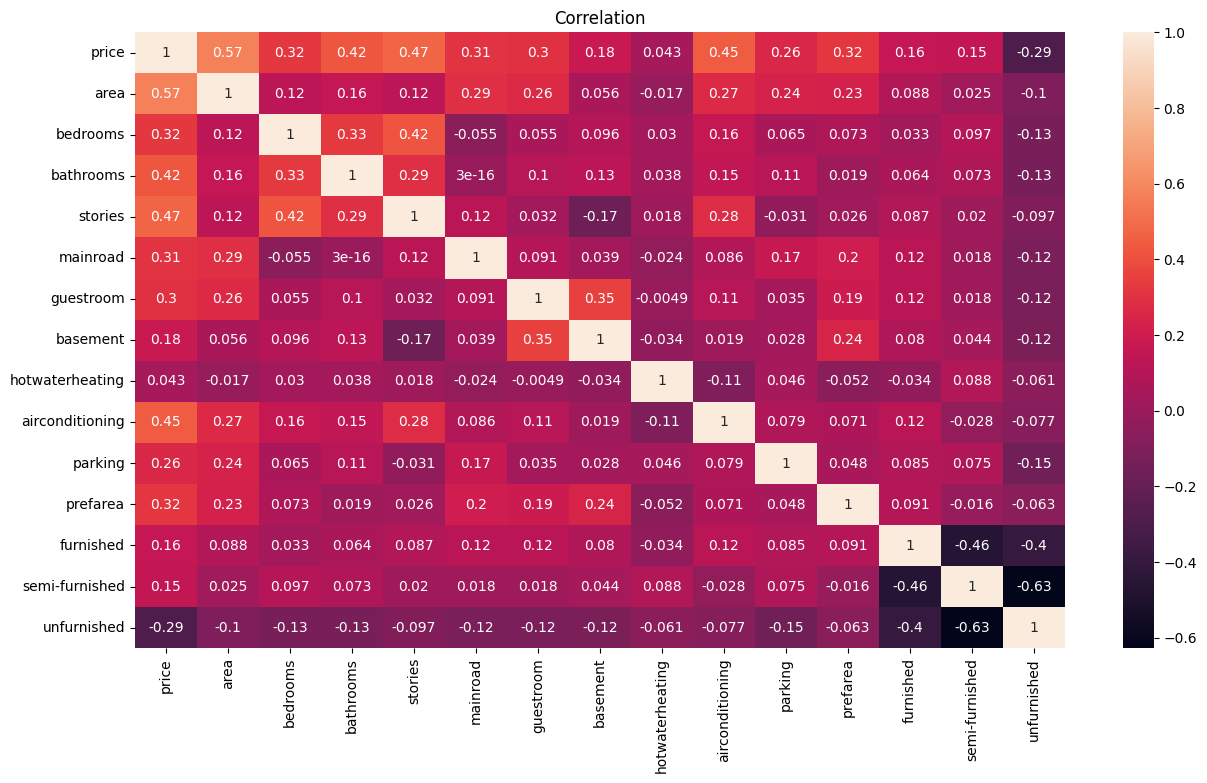

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(df.corr(), ax=ax, annot=True)
ax.set_title('Correlation')
plt.show()

ความสัมพันธ์ของ ราคา กับ พื้นที่ มีค่ามากที่สุด  =  0.57

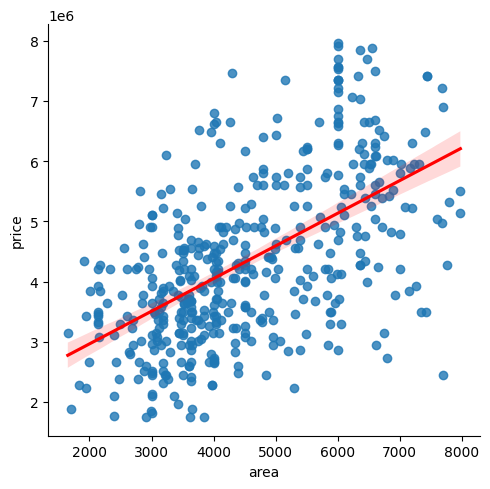

In [64]:
sns.lmplot(x='area',y='price',data=df,fit_reg=True,line_kws={'color': 'red'})

# 2. Train and test split data 80:20

- เตรียมตัวแปร X,y สำหรับการสร้างโมเดล

Drop Column "Price" ทิ้ง เพราะเป็นตัวที่เราจะทำนาย และ Drop Column ที่มีค่าความสัมพันธ์กับ"Price"ต่ำ

In [65]:
X = df.drop(['price','hotwaterheating','unfurnished'],axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnished,semi-furnished
38,6000,3,1,4,1,1,0,1,2,0,0,0
39,6000,4,2,4,1,0,0,1,1,0,0,1
40,6550,3,1,2,1,0,1,1,0,1,1,0
41,6360,3,2,4,1,0,0,1,0,1,1,0
42,6480,3,2,4,1,0,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,2,0,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,1,0


In [66]:
y = df.price
y

38     7962500
39     7910000
40     7875000
41     7840000
42     7700000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 462, dtype: int64

Import Scikit Learn ช่วยในการสร้างโมเดล

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

แบ่งข้อมูลเป็น 80:20 (Train:Test)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnished,semi-furnished
494,6800,2,1,1,1,0,0,0,0,0,0,0
340,5300,5,2,2,1,0,0,0,0,0,0,1
106,5450,4,2,1,1,0,1,1,0,1,0,1
271,1905,5,1,2,0,0,1,0,0,0,0,1
244,5320,3,1,2,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
163,6825,3,1,1,1,1,1,1,0,1,0,1
345,2015,3,1,2,1,0,1,0,0,1,0,1
428,4040,2,1,1,1,0,0,0,1,0,0,0
518,3500,2,1,1,1,1,0,0,0,0,0,0


# 3.สร้าง ML Regression Model และทดสอบ MSE กับ Testset

สร้างโมเดล Regression

In [69]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
model.score(X_train,y_train)

0.6610239632229731

Predict Testset  (ทดสอบทำนายราคากับ Testset)

In [71]:
y_predict = model.predict(X_test)

r2 = r2_score(y_test,y_predict)
print(f"R2(R-Squared) = {r2}")

R2(R-Squared) = 0.741241064304196


In [72]:
mse = mean_squared_error(y_test,y_predict)
rmse = mse**(1/2)

print(f"สรุปประสิทธิภาพของโมเดล \n")
print(f"MSE  = {mse :,.3f} \n")
print(f"RMSE = {rmse :,.3f}")

สรุปประสิทธิภาพของโมเดล 

MSE  = 596,014,950,351.598 

RMSE = 772,020.045


เปรียบเทียบระหว่าง ค่าจริง(y_test) กับ ค่าที่โมเดลทำนายได้(y_predict)

In [73]:
df_predict = pd.DataFrame()
df_predict['y_test'] = y_test
df_predict['y_predict'] = y_predict.astype('int64')
print(f"\nตารางเปรียบเทียบระหว่าง ค่าจริง(y_test) กับ ค่าที่โมเดลทำนายได้(y_predict) \n")
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(df_predict)


ตารางเปรียบเทียบระหว่าง ค่าจริง(y_test) กับ ค่าที่โมเดลทำนายได้(y_predict) 



,y_test,y_predict
298,4200000,4274172
75,6650000,4485053
86,6510000,5539712
295,4200000,3096074
185,5110000,3364058
275,4319000,3484572
484,2870000,2384872
284,4270000,4540332
539,1855000,2577776
132,5810000,5283628


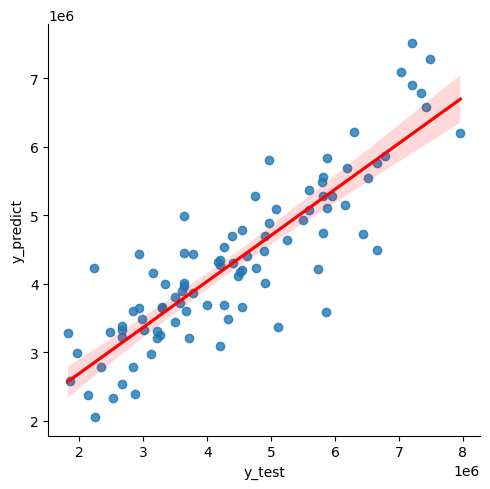

In [74]:
sns.lmplot(x='y_test',y='y_predict',data=df_predict,fit_reg=True,line_kws={'color': 'red'})

# 4. Save Model

In [75]:
import pickle
pickle.dump(model, open('ml_6610422020.sav','wb') )

from google.colab import files
files.download('ml_6610422020.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>